hello! 4.5.4-dev
<module 'ntpath' from 'C:\\Users\\6509504\\Anaconda3\\lib\\ntpath.py'>
<class 'numpy.ndarray'>


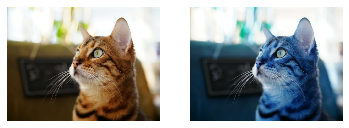

uint8 (480, 640, 3)


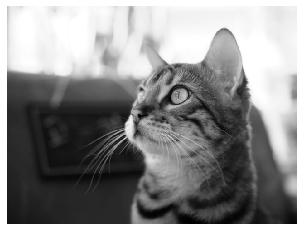

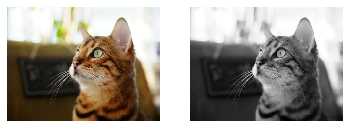

In [14]:
# https://moonfac.tistory.com/69
# : 가상환경 구성할때, 인터프리터 경로 새로 지정 필요


# https://docs.opencv.org/
# : openCV 주요 함수 설명 사이트

import os
import sys
import cv2
print('hello!', cv2.__version__)
print(os.path)

img = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
# cv2.IMREAD_COLOR BGR 컬러 영상으로 읽기 (기본값)
# shape = (rows, cols, 3)
# cv2.IMREAD_GRAYSCALE 그레이스케일 영상으로 읽기
# shape = (rows, cols)
# cv2.IMREAD_UNCHANGED 영상 파일 속성 그대로 읽기
# (e.g.) 투명한 PNG 파일: shape = (rows, cols, 4)


print(type(img))  # type : <class 'numpy.ndarray'>
if img is None:
    print('No image')
    sys.exit()

cv2.imwrite('cat_gray.jpg', img)
# filename: 저장할 영상 파일 이름 (문자열)
# img: 저장할 영상 데이터 (numpy.ndarray)

cv2.namedWindow('image', cv2.WINDOW_AUTOSIZE)
# cv2.WINDOW_AUTOSIZE : 창 크기를 영상 크기에 맞게 변경
# cv2.WINDOW_NORMAL : 영상 크기를 창크기에 맞게 지정

###### 아주 중요, 영상 데이터는 uint8 타입이어야 이상없이 꺠지지 않고 출력 #######
###### 아주 중요, 영상 데이터는 uint8 타입이어야 이상없이 꺠지지 않고 출력 #######
cv2.imshow('image', img)  # 아주 중요, 영상 데이터는 uint8 타입이어야 이상없이 꺠지지 않고 출력 #######
# winname: 영상을 출력할 대상 창 이름
# mat: 출력할 영상 데이터 (numpy.ndarray)

cv2.waitKey(3000)  # 또는 a = cv2.waitKey()
# delay: 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다림. 기본값은 0.
# retval(리턴 밸류): 눌린 키 값(ASCII code). 키가 눌리지 않으면 -1.
# cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때 동작함
# 특정 키 입력을 확인하려면 ord() 함수를 이용
# while True:
#     if cv2.waitKey() == ord('q'):  'q'를 누를때까지 종료하지 않음
#     break

cv2.destroyAllWindows()
# cv2.destroyWindow(winname) -> None
# cv2.destroyAllWindows() -> None
# cv2.destroyWindow() 함수는 지정한 창 하나만 닫고, cv2.destroyAllWindows() 함수는 열려 있는 모든 창을 닫음






# 컬러 영상 - cv2.imread() / cv2.cvtColor()
# 컬러 영상의 색상 정보가 RGB 순서이어야 함
# 그러나, cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서로 됨.
#  따라서 이를 RGB 순서로 변경해야 함 -> cv2.cvtColor() 함수 이용

import matplotlib.pyplot as plt
import numpy as np
imgBGR = cv2.imread('cat.bmp')
imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)  ## 해당 코드 없을 경우, 색상 반전 발생

plt.axis('off')
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgBGR)
plt.show()

print(imgBGR.dtype ,imgBGR.shape)

# 그레이스케일 영상 출력 : 흑백사진
imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
plt.axis('off')
plt.imshow(imgGray, cmap='gray')
plt.show()

imgGray = cv2.imread('cat.bmp', cv2.IMREAD_GRAYSCALE)
plt.imshow(imgGray)  ## cmap 설정안하고 그냥 출력하면, 노랑/보라 섞여서 나옴(default, cmap : viridis )
plt.show()


# Matplotlib을 이용하여 창 하나에 여러개의 이미지 출력하기
# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(imgRGB)
plt.subplot(122), plt.axis('off'), plt.imshow(imgGray, cmap='gray')
plt.show()




In [11]:
import os
file_list = os.listdir('.\\images')  ## 폴더 경로 설정
img_files = [".\\images" + "\\" + file for file in file_list if file.endswith('.jpg')]  ## img_files라는 리스트에 jpg 확장자만 골라내어 원소로 만들기

print(file_list, img_files, sep='\n\n')


['autumn_forest_park_128379_1920x1080.jpg', 'boat_mountains_lake_135258_1920x1080.jpg', 'forest_fog_trees_128751_1920x1080.jpg', 'image_download_url.txt', 'pier_dock_sea_dusk_shore_118549_1920x1080.jpg', 'road_marking_evening_clouds_horizon_120298_1920x1080.jpg']

['.\\images\\autumn_forest_park_128379_1920x1080.jpg', '.\\images\\boat_mountains_lake_135258_1920x1080.jpg', '.\\images\\forest_fog_trees_128751_1920x1080.jpg', '.\\images\\pier_dock_sea_dusk_shore_118549_1920x1080.jpg', '.\\images\\road_marking_evening_clouds_horizon_120298_1920x1080.jpg']


In [12]:
cv2.namedWindow('image', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('image', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

cnt = len(img_files)
idx = 0

for idx in range(0,cnt):
    img = cv2.imread( img_files[idx])
    
    if img is None:
        print('No Image')
        break
        
    cv2.imshow('image', img)
    cv2.waitKey(1500)
#     if cv2.waitKey(1000) >= 0:
#         break
    
    idx += 1
    if idx >= cnt:
        cv2.destroyAllWindows()
    


In [15]:
### RGB 배열 확인해보기 1 ###

img = cv2.imread('RED.jpg', cv2.IMREAD_COLOR)  
print(img.dtype, type(img), img.shape, img)   ## BGR 순서로 읽는게 확인됨

img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
print(img_cvt)  ## RGB로 바뀜

# cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.imshow('img',img_cvt)  ### 파랑 화면 출력됨
cv2.waitKey()

uint8 <class 'numpy.ndarray'> (727, 500, 3) [[[  1   2 184]
  [  2   2 186]
  [  2   1 187]
  ...
  [  0   0 200]
  [  0   0 200]
  [  0   0 200]]

 [[  1   2 184]
  [  2   2 186]
  [  2   1 187]
  ...
  [  0   0 200]
  [  0   0 200]
  [  0   0 200]]

 [[  1   2 184]
  [  2   2 186]
  [  2   1 187]
  ...
  [  0   0 200]
  [  0   0 200]
  [  0   0 200]]

 ...

 [[  0   0 206]
  [  0   0 206]
  [  0   0 206]
  ...
  [  1   0 210]
  [  1   0 210]
  [  1   0 210]]

 [[  0   0 206]
  [  0   0 206]
  [  0   0 206]
  ...
  [  1   0 210]
  [  1   0 210]
  [  1   0 210]]

 [[  1   1 207]
  [  0   0 206]
  [  0   0 206]
  ...
  [  4   1 210]
  [  4   1 210]
  [  4   1 210]]]
[[[184   2   1]
  [186   2   2]
  [187   1   2]
  ...
  [200   0   0]
  [200   0   0]
  [200   0   0]]

 [[184   2   1]
  [186   2   2]
  [187   1   2]
  ...
  [200   0   0]
  [200   0   0]
  [200   0   0]]

 [[184   2   1]
  [186   2   2]
  [187   1   2]
  ...
  [200   0   0]
  [200   0   0]
  [200   0   0]]

 ...

 [[206  

-1

In [26]:
### RGB 배열 확인해보기 2 ###
import numpy as np

img = np.full((400, 400, 3), (0, 0, 255), np.uint8)  
print(img.dtype, type(img), img.shape, img)   

cv2.imwrite('AllRED.jpg', img)  ## opencv는 BGR로 동작하므로, 빨강색 그림 생성

img_imread = cv2.imread('AllRED.jpg')

print(img_imread) ## BGR로 numpy 배열됨

# cv2.namedWindow('img', cv2.WINDOW_NORMAL)
cv2.imshow('img_read',img_imread)  ### 빨강 화면 출력됨
cv2.imshow('img',img)

### 즉, open cv의 모든함수는 BGR로서 인식한다. 

cv2.waitKey()



uint8 <class 'numpy.ndarray'> (400, 400, 3) [[[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 ...

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]

 [[  0   0 255]
  [  0   0 255]
  [  0   0 255]
  ...
  [  0   0 255]
  [  0   0 255]
  [  0   0 255]]]
[[[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 [[  0   0 254]
  [  0   0 254]
  [  0   0 254]
  ...
  [  0   0 254]
  [  0   0 254]
  [  0   0 254]]

 ...

 [[  0  

-1

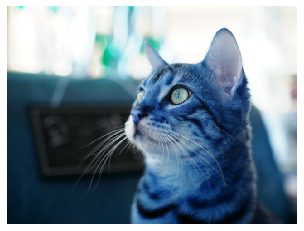

In [30]:
### cv2와 matplotlib 비교하기  ###

imgcat = cv2.imread('cat.bmp')
cv2.imshow('imgcat',imgcat)  ## 본래 화면 출력 (opencv는 모든 함수는 BGR 기준이므로, 호환 가능)
cv2.waitKey()  

import matplotlib.pyplot as plt  
plt.axis('off')
plt.imshow(imgcat) ## 반전화면 출력 (opencv의 imread를 거쳐간 'imgcat' 파일이므로 반전되어 있음 -> cvtcolor로 호환될수 있게 수정필요)
plt.show()
